In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
features = pd.read_csv('../data/strokes.csv', delimiter=";")
features.describe()
features.head(2)
df = pd.read_csv('../data/strokesM.csv', delimiter=";")
df.describe()


,sess,slabel,t,x,y,v,vd,th,w,c,cs,Unnamed: 11
count,2.101960e+05,210196.000000,210196.000000,210196.00000,210196.000000,201917.000000,1.936380e+05,201917.000000,193638.000000,193638.000000,193638.000000,0
mean,1.426935e+09,5223.773968,908135.129181,684.92124,371.858123,1023.321791,6.468731e+05,0.663020,41.823155,0.020890,0.045202,NaN
std,2.023761e+06,2910.464153,1434005.801433,348.95384,179.193511,8606.808310,1.074387e+08,1.966860,366.188414,0.402966,0.085746,NaN
min,1.424664e+09,1.000000,83.490204,0.00000,0.000000,0.000000,-3.488067e+08,-9.424778,0.000000,-3.141593,0.000000,NaN
25%,1.424768e+09,2610.000000,3687.413520,407.00000,252.000000,178.177803,-1.875313e+04,-0.321751,0.000000,-0.003858,0.000000,NaN
50%,1.428470e+09,5479.000000,677751.869905,676.00000,383.000000,408.933313,-5.014857e+00,0.000000,10.395406,0.000000,0.010239,NaN
75%,1.428884e+09,7770.000000,777596.659139,942.00000,499.000000,975.348151,1.612806e+04,2.356194,40.294432,0.004741,0.058824,NaN
max,1.428884e+09,9957.000000,4664730.374672,1466.00000,881.000000,1443727.698303,3.901875e+10,17.278760,119887.840546,3.141593,4.000000,NaN


In [13]:
df.count()

sess           210196
slabel         210196
t              210196
x              210196
y              210196
v              201917
vd             193638
th             201917
w              193638
c              193638
cs             193638
Unnamed: 11         0
dtype: int64

In [14]:
len(list(df['w'].index[df['w'].apply(np.isnan)]))

16558

In [5]:
print len(features.x[0]), len(features.y[0])

122 117


In [8]:
xlen=[len(features.x[i].split(',')) for i in features.index]
ylen=[len(features.y[i].split(',')) for i in features.index]
tlen=[len(features.t[i].split(',')) for i in features.index]
vlen=[len(features.v[i].split(',')) for i in features.index]
print len(xlen), len(ylen), len(tlen), len(vlen)

8279 8279 8279 8279


In [9]:
features['xlen']=xlen
features['ylen']=ylen
features['tlen']=tlen
features['vlen']=vlen

In [10]:
len(features.x[8273].split(','))

11

In [11]:
#features[features.xlen <> features.ylen]
features[['x','xlen','y','ylen','t','tlen','v','vlen']].head()

,x,xlen,y,ylen,t,tlen,v,vlen
0,"[957,951,938,929,914,892,859,818,775,736,692,6...",31,"[67,72,80,86,95,107,126,145,163,188,210,235,25...",31,"[671362.93680039374,671362.94482307963,671362....",31,"[973.52056260835445,1905.9995416730944,1353.38...",30
1,"[536,540,544,552,560,569,578,588,596,603,606,6...",36,"[349,349,349,349,347,345,342,339,337,334,334,3...",36,"[671363.26486538269,671363.2728991874,671363.2...",36,"[497.89609574180105,500.82865279448191,999.997...",35
2,"[653,653,652,651,651,650,]",7,"[318,318,318,318,318,319,]",7,"[671363.64895788475,671363.66479798523,671363....",7,"[0,123.12389386708335,62.984673813088776,0,176...",6
3,"[646,645,648,656,664,671,678,682,682,681,681,6...",13,"[320,320,321,324,328,330,333,333,333,327,321,3...",13,"[671363.77688850649,671363.79220050643,671363....",13,"[65.308255198139534,206.52283643765207,557.993...",12
4,"[681,679,678,677,676,675,675,675,675,675,675,6...",44,"[309,303,299,295,291,288,284,281,277,273,269,2...",44,"[671364.54483573802,671364.55271473411,671364....",44,"[802.71080909898069,517.32265790376289,505.655...",43


In [42]:
def flatten(*args):
    for x in args:
        if hasattr(x, '__iter__'):
            for y in flatten(*x):
                yield y
        else:
            yield x


In [43]:
import re
features.x[0][1:-2].split(',')[:-1]

['957',
 '951',
 '938',
 '929',
 '914',
 '892',
 '859',
 '818',
 '775',
 '736',
 '692',
 '651',
 '611',
 '582',
 '562',
 '547',
 '541',
 '535',
 '534',
 '532',
 '532',
 '532',
 '532',
 '532',
 '532',
 '532',
 '532',
 '532',
 '532']

In [44]:
v = pd.DataFrame()
l = [features.v[i][1:-2].split(',') for i in features.index]
f=list(flatten(l))
v['v'] = f


In [45]:
t = pd.DataFrame()
l = [features.t[i][1:-2].split(',')[:-1] for i in features.index]
f=list(flatten(l))
t['t'] = f


In [46]:
def session(x, y):
    r=[]
    for i in y:
        r.append([x,i])
    return r

In [48]:
features['nv'] = [map(float, features.v[i][1:-2].split(',')) for i in features.index]
features['nt'] = [map(float, features.t[i][1:-2].split(',')[:-1]) for i in features.index]
features[['nv','nt']].head(2)

,nv,nt
0,"[973.520562608, 1905.99954167, 1353.38048196, ...","[671362.9368, 671362.944823, 671362.952832, 67..."
1,"[497.896095742, 500.828652794, 999.997435028, ...","[671363.264865, 671363.272899, 671363.280886, ..."


In [49]:
for i in features.index:
    print len(features.nv[i]), len(features.nt[i])

29 29
34 34
5 5
11 11
42 42
14 14
10 10
10 10
10 10
18 18
12 12
4 4
22 22
43 43
98 98
11 11
4 4
25 25
24 24
34 34
8 8
11 11
16 16
15 15
45 45
24 24
19 19
9 9
14 14
25 25
29 29
25 25
57 57
42 42
33 33
36 36
17 17
26 26
28 28
18 18
7 7
17 17
12 12
7 7
26 26
22 22
27 27
11 11
62 62
32 32
9 9
11 11
38 38
27 27
10 10
29 29
12 12
18 18
8 8
25 25
20 20
26 26
24 24
27 27
18 18
34 34
12 12
28 28
70 70
5 5
11 11
5 5
15 15
62 62
70 70
37 37
3 3
34 34
20 20
44 44
79 79
21 21
4 4
4 4
36 36
47 47
73 73
16 16
18 18
7 7
76 76
37 37
3 3
13 13
17 17
109 109
43 43
42 42
17 17
26 26
33 33
10 10
38 38
23 23
39 39
24 24
28 28
22 22
59 59
38 38
54 54
48 48
5 5
24 24
59 59
23 23
3 3
27 27
49 49
26 26
62 62
30 30
6 6
43 43
48 48
43 43
11 11
5 5
64 64
21 21
37 37
21 21
3 3
28 28
7 7
36 36
46 46
96 96
63 63
66 66
17 17
27 27
9 9
82 82
25 25
53 53
22 22
20 20
18 18
28 28
47 47
19 19
30 30
11 11
14 14
24 24
47 47
20 20
35 35
11 11
53 53
11 11
41 41
8 8
5 5
8 8
22 22
20 20
26 26
14 14
11 11
21 21
68 68
70 70
28 28


In [50]:
xx=[]
for i in features.index:
    for j in range(0,len(features.nt[i])):
        xx.append([features.sess[i], features.nt[i][j]/sum(features.nt[i]),
                                     features.nv[i][j]/sum(features.nv[i])])

In [96]:
nf=pd.DataFrame(xx, columns=['sess','t','v'])

In [8]:
df.drop(['vd','w','c','cs','Unnamed: 11'], axis=1, inplace=True)

In [30]:
df.count()

sess      210196
slabel    210196
t         210196
x         210196
y         210196
v         201917
th        201917
dtype: int64

In [101]:
df2=df[:100].copy()

In [102]:
type(df2)

pandas.core.frame.DataFrame

In [118]:
gb=df2.groupby(['slabel'])

In [121]:
gb.describe().head()

sess  slabel              t           x           y  \
slabel                                                                    
1      count          30      30      30.000000   30.000000   30.000000   
       mean   1424664435       1  671363.053133  662.533333  248.166667   
       std             0       0       0.069636  164.222039  105.280932   
       min    1424664435       1  671362.936800  532.000000   67.000000   
       25%    1424664435       1  671362.994863  532.000000  149.500000   

                        v         th  
slabel                                
1      count    29.000000  29.000000  
       mean   2247.218880   2.046354  
       std    2276.397386   0.729067  
       min       0.000000   0.000000  
       25%     135.283136   1.570796

In [17]:
def normalize(group):                                                      
    mean = group.values.ravel().mean()
    std = group.values.ravel().std(ddof=1)
    return group.applymap(lambda x: (x - mean)/std)

In [3]:
nt=[]
for _, group in df.groupby('slabel'):
    mean = group.t.values.ravel().mean()
    min = group.t.values.ravel().min()
    max = group.t.values.ravel().max()
    std = group.t.values.ravel().std(ddof=1)
#    print "AAA", group.t.values.ravel()
    nt.append((group.t.values.ravel() - min) / (max - min))
#    print "CCC", (group.t.values.ravel() - mean) / std
print nt

[array([ 0.        ,  0.03342164,  0.06678449,  0.10007963,  0.13365092,
        0.16700664,  0.2003303 ,  0.23366464,  0.26653044,  0.30029769,
        0.33454418,  0.36635888,  0.39981615,  0.43328232,  0.46619088,
        0.50000445,  0.53288272,  0.56664998,  0.59955497,  0.6332189 ,
        0.66663341,  0.69987511,  0.73618284,  0.76697671,  0.79973562,
        0.83350109,  0.86635264,  0.90009317,  0.93525537,  1.        ]), array([ 0.        ,  0.02953258,  0.05889224,  0.08830063,  0.11771688,
        0.1466002 ,  0.17606361,  0.2059389 ,  0.23489611,  0.26471638,
        0.29419394,  0.32360076,  0.35257526,  0.38238767,  0.41179606,
        0.44120602,  0.4705751 ,  0.50001651,  0.5289187 ,  0.55887102,
        0.58823696,  0.61767207,  0.6470726 ,  0.67647313,  0.70549951,
        0.73530877,  0.76469201,  0.79411769,  0.82343333,  0.85290303,
        0.88184295,  0.91174496,  0.94099458,  0.97048628,  1.        ]), array([ 0.        ,  0.28307438,  0.42821879,  0.71195042, 

In [4]:
ntt=[item for sublist in nt for item in sublist]

In [5]:
df['nt'] = ntt

In [10]:
df.head()

,sess,slabel,t,x,y,v,th,nt
0,1424664435,1,671362.936800,957,67,973.520563,2.446854,0.000000
1,1424664435,1,671362.944823,951,72,1905.999542,2.589938,0.033422
2,1424664435,1,671362.952832,938,80,1353.380482,2.553590,0.066784
3,1424664435,1,671362.960824,929,86,2170.704306,2.601173,0.100080
4,1424664435,1,671362.968883,914,95,3129.806060,2.642246,0.133651


sess
1424664435    Axes(0.125,0.125;0.775x0.775)
1424767500    Axes(0.125,0.125;0.775x0.775)
1424770997    Axes(0.125,0.125;0.775x0.775)
1428470230    Axes(0.125,0.125;0.775x0.775)
1428883647    Axes(0.125,0.125;0.775x0.775)
dtype: object

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


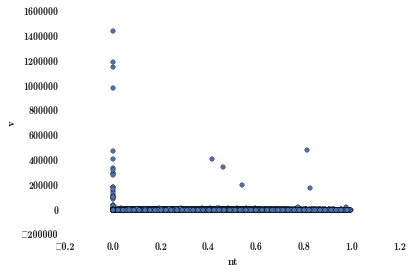

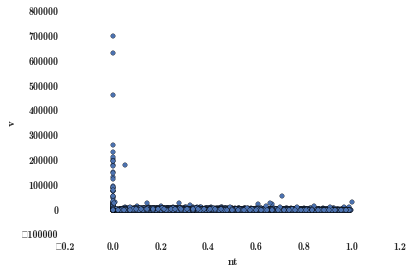

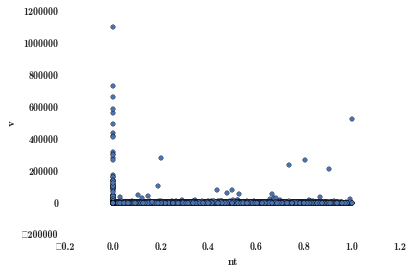

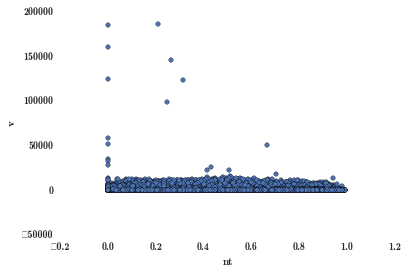

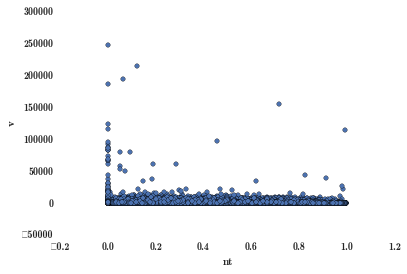

In [11]:
df.groupby('sess').plot('nt','v',kind='scatter')

In [136]:
df2.groupby('slabel').describe()

nt          sess              t         th            v  \
slabel                                                                         
1      count  30.000000  3.000000e+01      30.000000  29.000000    29.000000   
       mean    0.484629  1.424664e+09  671363.053133   2.046354  2247.218880   
       std     0.295487  0.000000e+00       0.069636   0.729067  2276.397386   
       min     0.000000  1.424664e+09  671362.936800   0.000000     0.000000   
       25%     0.241881  1.424664e+09  671362.994863   1.570796   135.283136   
       50%     0.483098  1.424664e+09  671363.052765   2.427502  1334.458580   
       75%     0.727106  1.424664e+09  671363.111338   2.594030  4248.785514   
       max     1.000000  1.424664e+09  671363.176845   2.745151  6287.961534   
2      count  35.000000  3.500000e+01      35.000000  34.000000    34.000000   
       mean    0.499922  1.424664e+09  671363.400860  -0.308897   453.080853   
       std     0.301361  1.552228e+01       0.081631   0.389367   371.799019   
       min     0.000000  1.424664e+09  671363.264865  -1.570796     0.000000   
       25%     0.249806  1.424664e+09  671363.332821  -0.384106   176.767400   
       50%     0.500017  1.424664e+09  671363.400886  -0.284878   326.731305   
       75%     0.750000  1.424664e+09  671363.468889   0.000000   500.095514   
       max     1.000000  1.424664e+09  671363.536897   0.000000  1284.639510   
3      count   6.000000  6.000000e+00       6.000000   5.000000     5.000000   
       mean    0.546715  1.424664e+09  671363.679551   1.727876    72.580742   
       std     0.377233  2.023858e+01       0.017116   1.609587    77.529453   
       min     0.000000  1.424664e+09  671363.648958   0.000000     0.000000   
       25%     0.319360  1.424664e+09  671363.666828   0.000000     0.000000   
       50%     0.570085  1.424664e+09  671363.680858   2.356194    62.984674   
       75%     0.820774  1.424664e+09  671363.694886   3.141593   123.123894   
       max     1.000000  1.424664e+09  671363.704915   3.141593   176.795144   
4      count  12.000000  1.200000e+01      12.000000  11.000000    11.000000   
       mean    0.500000  1.424664e+09  671363.861105   0.008310   354.025358   
       std     0.327777  1.929673e+01       0.054941   1.360358   195.663224   
       min     0.000000  1.424664e+09  671363.776889  -1.735945     0.000000   
       25%     0.250000  1.424664e+09  671363.818997  -0.785398   233.877929   
       50%     0.500000  1.424664e+09  671363.861105   0.278300   397.254608   
       75%     0.750000  1.424664e+09  671363.903213   0.381831   486.412064   
       max     1.000000  1.424664e+09  671363.945321   3.141593   584.134792   
5      count  17.000000  1.700000e+01      17.000000  17.000000    17.000000   
       mean    0.499880  1.424664e+09  671364.608831  -1.545936   470.829003   
       std     0.315858  0.000000e+00       0.039836   0.263246   157.880566   
       min     0.000000  1.424664e+09  671364.544836  -1.892547   249.705695   
       25%     0.249841  1.424664e+09  671364.576821  -1.815775   373.362445   
       50%     0.499599  1.424664e+09  671364.608795  -1.570796   502.065269   
       75%     0.750142  1.424664e+09  671364.640870  -1.405648   516.546606   
       max     1.000000  1.424664e+09  671364.672857  -1.107149   802.710809   

                       x           y  
slabel                                
1      count   30.000000   30.000000  
       mean   662.533333  248.166667  
       std    164.222039  105.280932  
       min    532.000000   67.000000  
       25%    532.000000  149.500000  
       50%    554.500000  299.500000  
       75%    807.250000  341.500000  
       max    957.000000  347.000000  
2      count   35.000000   35.000000  
       mean   615.285714  330.428571  
       std     35.413998    9.962535  
       min    536.000000  318.000000  
       25%    599.500000  323.000000  
       50%    626.000000  328.000000  
       75%    642.000000  335.500000

In [116]:
gb.head()

,sess,slabel,t,x,y,v,vd,th,w,c,cs,Unnamed: 11
0,1424664435,1,671362.936800,957,67,973.520563,116435.089574,2.446854,17.866265,0.009374,0.032075,NaN
1,1424664435,1,671362.944823,951,72,1905.999542,-69143.735334,2.589938,4.547817,-0.003360,0.008824,NaN
2,1424664435,1,671362.952832,938,80,1353.380482,101422.453567,2.553590,5.904630,0.002720,0.011236,NaN
3,1424664435,1,671362.960824,929,86,2170.704306,119784.959557,2.601173,5.129697,0.001639,0.009945,NaN
4,1424664435,1,671362.968883,914,95,3129.806060,203839.878325,2.642246,2.882390,-0.000605,0.005519,NaN
30,1424664435,2,671363.264865,536,349,497.896096,367.177149,0.000000,0.000000,0.000000,0.000000,NaN
31,1424664435,2,671363.272899,540,349,500.828653,62395.937735,0.000000,0.000000,0.000000,0.000000,NaN
32,1424664435,2,671363.280886,544,349,999.997435,3811.584195,0.000000,30.614072,-0.029708,0.061538,NaN
33,1424664435,2,671363.288886,552,349,1030.498337,18186.129681,-0.244979,3.348491,0.002854,0.006557,NaN
34,1424664435,2,671363.296888,560,347,1173.390139,1278.404984,-0.218669,12.861105,-0.010866,0.025788,NaN


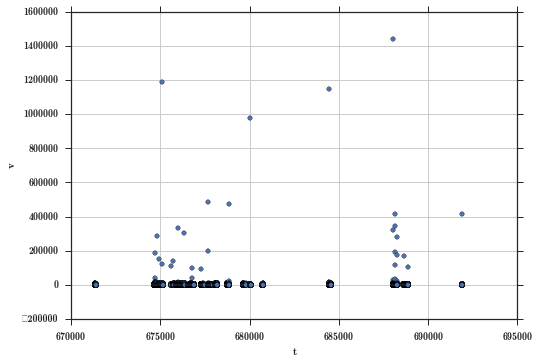

In [106]:
df[(df.sess == 1424664435)].plot(x='t',y='v',kind='scatter',logx=False)

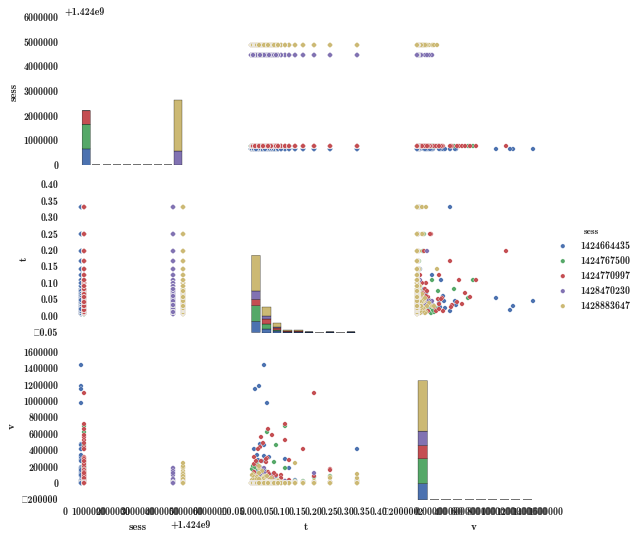

In [235]:
sns.pairplot(nf, hue="sess", size=2.5);

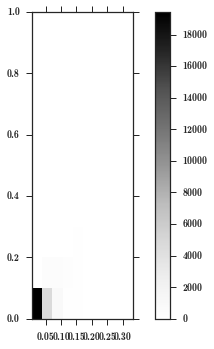

In [79]:
from pylab import *
import numpy

# the x distribution will be centered at -1, the y distro
# at +1 with twice the width.
x = numpy.random.randn(3000)-1
y = numpy.random.randn(3000)*2+1

hist,xedges,yedges = numpy.histogram2d(nf[nf.sess == 1424664435].t,nf[nf.sess == 1424664435].v)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1] ]
imshow(hist.T,extent=extent,interpolation='nearest',origin='lower')
colorbar()
show()


In [31]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(df['sess'=1424767500 ].t, df.v, kind="hex", stat_func=kendalltau, color="#4CB391")


SyntaxError: invalid syntax (<ipython-input-31-b6f8eb271ef2>, line 10)

In [33]:
gb

NameError: name 'gb' is not defined